# Danny Hogan
# February 23, 2025           It's raining outside

Simple East River and Tuolumne Basemap examples

Example gallery: http://matplotlib.org/basemap/users/examples.html

Documentation: https://basemaptutorial.readthedocs.io/en/latest/

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib import gridspec
import numpy as np
import geopandas as gpd
from pathlib import Path
import rioxarray as rxr
from utils.read_files import read_from_control, make_default_path

In [ ]:
# Store the name of the 'active' file in a variable
controlFile = 'control_EastRiver.txt'
# basin name and outlet gauge id
root_path = Path(read_from_control(controlFile, "root_path"))
shapefile_path = "shapefiles/catchment"

eastRiver = gpd.read_file(root_path / "domain_EastRiver" / shapefile_path / "EastRiver.shp")
tuolumneRiver = gpd.read_file(root_path / "domain_TuolumneRiver" / shapefile_path / "TuolumneRiver.shp")

In [4]:
eastRiver_dem = rxr.open_rasterio(root_path / "domain_EastRiver" / "parameters" / "dem" / "dem.tif")
tuolumneRiver_dem = rxr.open_rasterio(root_path / "domain_TuolumneRiver" / "parameters" / "dem" / "dem.tif")

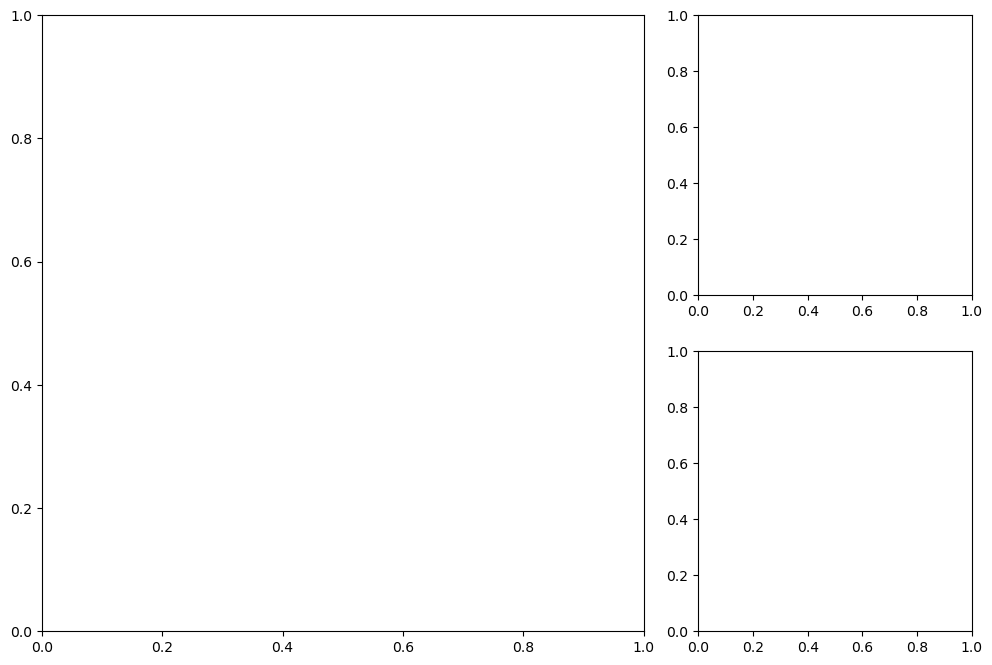

In [5]:
# Make a figure with one largesubplot and two smaller ones on the right
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1])
ax1 = plt.subplot(gs[0:2, 0:2])
ax2 = plt.subplot(gs[0, 2])
ax3 = plt.subplot(gs[1,2])

# Easiest way to make a basemap is to use the cylidrical projection and 
# define the bottom left lat/lon and top right lat/lon corners

# Map of Western US
bot_left_lat  = 30
bot_left_lon  = -125
top_right_lat = 50
top_right_lon = -105

In [6]:
# create the map object, m
m = Basemap(resolution='i', projection='cyl', \
    llcrnrlon=bot_left_lon, llcrnrlat=bot_left_lat, \
    urcrnrlon=top_right_lon, urcrnrlat=top_right_lat, ax=ax1)

# Note: You can define the resolution of the map you just created. Higher 
# resolutions take longer to create.
#    'c' - crude
#    'l' - low
#    'i' - intermediate
#    'h' - high
#    'f' - full

# Draw some map elements on the map
# m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.drawrivers(color='blue')

# Drawing ArcGIS Basemap (only works with cylc projections??)
# Examples of what each map looks like can be found here:
# http://kbkb-wx-python.blogspot.com/2016/04/python-basemap-background-image-from.html
maps = ['ESRI_Imagery_World_2D',    # 0
        'ESRI_StreetMap_World_2D',  # 1
        'NatGeo_World_Map',         # 2
        'NGS_Topo_US_2D',           # 3
        'Ocean_Basemap',            # 4
        'USA_Topo_Maps',            # 5
        'World_Imagery',            # 6
        'World_Physical_Map',       # 7
        'World_Shaded_Relief',      # 8
        'World_Street_Map',         # 9
        'World_Terrain_Base',       # 10
        'World_Topo_Map'            # 11
        ]
print("drawing image from arcGIS server...",)
m.arcgisimage(service=maps[5], xpixels=1000, verbose=False)
print ("...finished")

# add star for the centroid of each catchment
eastRiver['centroid'] = eastRiver['geometry'].centroid
tuolumneRiver['centroid'] = tuolumneRiver['geometry'].centroid
for idx, row in eastRiver.iterrows():
    x, y = m(row['centroid'].x, row['centroid'].y)
    m.plot(x, y, 'r*', markersize=10)
    ax1.annotate('East\nRiver', xy=(x, y), xytext=(x, y-1.5),
                bbox=dict(boxstyle="round", fc="w", ec="k", lw=1, alpha=0.75), ha='center', fontsize=12)
for idx, row in tuolumneRiver.iterrows():
    x, y = m(row['centroid'].x, row['centroid'].y)
    m.plot(x, y, 'r*', markersize=10)
    ax1.annotate('Tuolumne\nRiver', xy=(x, y), xytext=(x, y-1.5),
                bbox=dict(boxstyle="round", fc="w", ec="k", lw=1, alpha=0.75), ha='center', fontsize=12)

# Add plot title and other plot elements the normal way
ax1.set_title('Western United States')


drawing image from arcGIS server...
...finished


/tmp/ipykernel_18454/859245408.py:41: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  eastRiver['centroid'] = eastRiver['geometry'].centroid
/tmp/ipykernel_18454/859245408.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tuolumneRiver['centroid'] = tuolumneRiver['geometry'].centroid


Text(0.5, 1.0, 'Western United States')

In [7]:
# add similar basemaps for the smaller plots showing the east and tuolumne river catchments
m2 = Basemap(resolution='i', projection='cyl', \
    llcrnrlon=eastRiver.total_bounds[0], llcrnrlat=eastRiver.total_bounds[1], \
    urcrnrlon=eastRiver.total_bounds[2], urcrnrlat=eastRiver.total_bounds[3], ax=ax2)
m2.arcgisimage(service=maps[8], xpixels=500, verbose=False)
eastRiver.plot(ax=ax2, facecolor='none', edgecolor='black')
eastRiver_dem.rio.reproject(eastRiver.crs).plot(ax=ax2, cmap='viridis', alpha=0.5, vmin=2750, vmax=3750, cbar_kwargs={'label': 'Elevation (m)'})
ax2.set_xlim(eastRiver.total_bounds[0], eastRiver.total_bounds[2])
ax2.set_ylim(eastRiver.total_bounds[1], eastRiver.total_bounds[3])
ax2.set_title('East River Catchment')
ax2.set_xlabel('')
ax2.set_ylabel('')

m2 = Basemap(resolution='i', projection='cyl', \
    llcrnrlon=tuolumneRiver.total_bounds[0], llcrnrlat=tuolumneRiver.total_bounds[1], \
    urcrnrlon=tuolumneRiver.total_bounds[2], urcrnrlat=tuolumneRiver.total_bounds[3], ax=ax3)
m2.arcgisimage(service=maps[8], xpixels=500, verbose=False)
tuolumneRiver.plot(ax=ax3, facecolor='none', edgecolor='black')
tuolumneRiver_dem.rio.reproject(tuolumneRiver.crs).plot(ax=ax3, cmap='viridis', alpha=0.5, vmin=1500, vmax=3500, cbar_kwargs={'label': 'Elevation (m)'})
ax3.set_xlim(tuolumneRiver.total_bounds[0], tuolumneRiver.total_bounds[2])
ax3.set_ylim(tuolumneRiver.total_bounds[1], tuolumneRiver.total_bounds[3])
ax3.set_title('Tuolumne River Catchment')
ax3.set_xlabel('')
ax3.set_ylabel('')

Text(660.9150326797386, 0.5, '')

<Figure size 640x480 with 0 Axes>

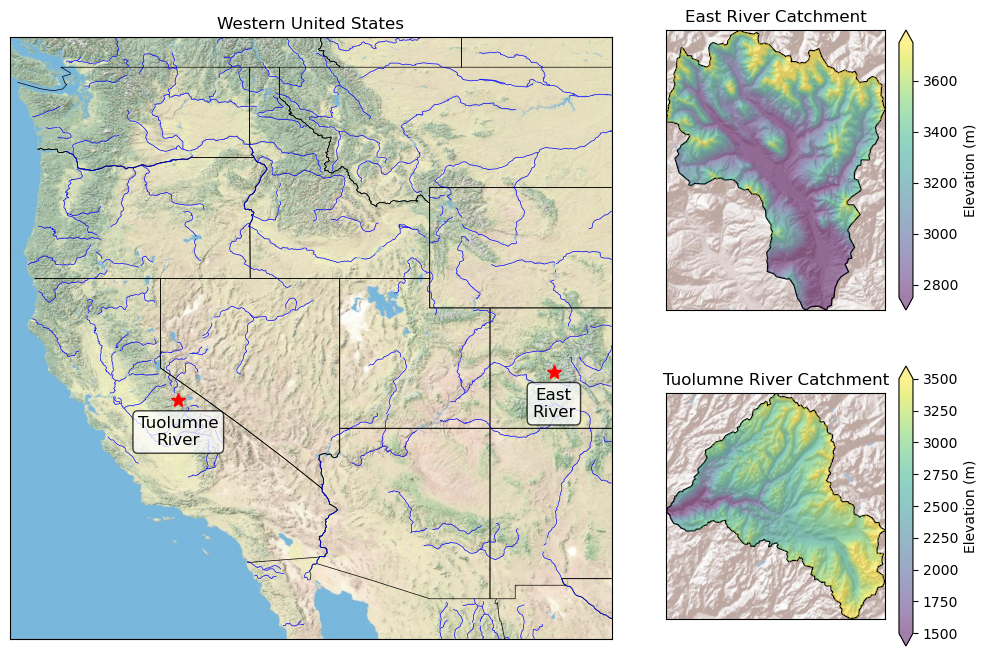

In [8]:
fig

drawing image from arcGIS server...
...finished


/tmp/ipykernel_18454/1717598263.py:41: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  eastRiver['centroid'] = eastRiver['geometry'].centroid
/tmp/ipykernel_18454/1717598263.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tuolumneRiver['centroid'] = tuolumneRiver['geometry'].centroid


Text(0.5, 1.0, 'Western United States')

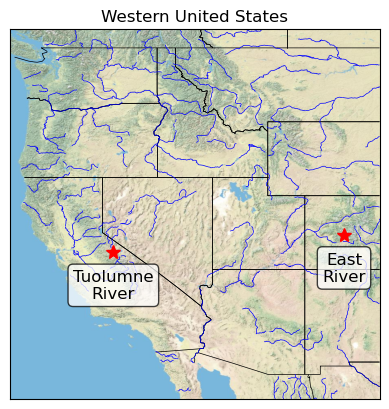

In [9]:
# create the map object, m
m = Basemap(resolution='i', projection='cyl', \
    llcrnrlon=bot_left_lon, llcrnrlat=bot_left_lat, \
    urcrnrlon=top_right_lon, urcrnrlat=top_right_lat)

# Note: You can define the resolution of the map you just created. Higher 
# resolutions take longer to create.
#    'c' - crude
#    'l' - low
#    'i' - intermediate
#    'h' - high
#    'f' - full

# Draw some map elements on the map
# m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.drawrivers(color='blue')

# Drawing ArcGIS Basemap (only works with cylc projections??)
# Examples of what each map looks like can be found here:
# http://kbkb-wx-python.blogspot.com/2016/04/python-basemap-background-image-from.html
maps = ['ESRI_Imagery_World_2D',    # 0
        'ESRI_StreetMap_World_2D',  # 1
        'NatGeo_World_Map',         # 2
        'NGS_Topo_US_2D',           # 3
        'Ocean_Basemap',            # 4
        'USA_Topo_Maps',            # 5
        'World_Imagery',            # 6
        'World_Physical_Map',       # 7
        'World_Shaded_Relief',      # 8
        'World_Street_Map',         # 9
        'World_Terrain_Base',       # 10
        'World_Topo_Map'            # 11
        ]
print("drawing image from arcGIS server...",)
m.arcgisimage(service=maps[5], xpixels=1000, verbose=False)
print ("...finished")

# add star for the centroid of each catchment
eastRiver['centroid'] = eastRiver['geometry'].centroid
tuolumneRiver['centroid'] = tuolumneRiver['geometry'].centroid
for idx, row in eastRiver.iterrows():
    x, y = m(row['centroid'].x, row['centroid'].y)
    m.plot(x, y, 'r*', markersize=10)
    plt.annotate('East\nRiver', xy=(x, y), xytext=(x, y-2.5),
                bbox=dict(boxstyle="round", fc="w", ec="k", lw=1, alpha=0.75), ha='center', fontsize=12)
for idx, row in tuolumneRiver.iterrows():
    x, y = m(row['centroid'].x, row['centroid'].y)
    m.plot(x, y, 'r*', markersize=10)
    plt.annotate('Tuolumne\nRiver', xy=(x, y), xytext=(x, y-2.5),
                bbox=dict(boxstyle="round", fc="w", ec="k", lw=1, alpha=0.75), ha='center', fontsize=12)

# Add plot title and other plot elements the normal way
plt.title('Western United States')

In [ ]:
splash_site = gpd.read_file("/home/dlhogan/GitHub/S3-precipitation-rodeo/01_data_preparation/geodata/splash_sites.json")
# add this point: Gothic 38.9592° N, 106.9898° W


AttributeError: 'GeoDataFrame' object has no attribute 'append'

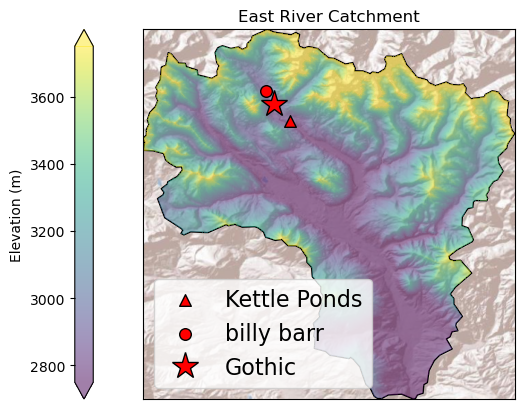

In [37]:
fig, ax = plt.subplots()
# add similar basemaps for the smaller plots showing the east and tuolumne river catchments
m2 = Basemap(resolution='i', projection='cyl', \
    llcrnrlon=eastRiver.total_bounds[0], llcrnrlat=eastRiver.total_bounds[1], \
    urcrnrlon=eastRiver.total_bounds[2], urcrnrlat=eastRiver.total_bounds[3], ax=ax)
m2.arcgisimage(service=maps[8], xpixels=500, verbose=False)
eastRiver.plot(facecolor='none', edgecolor='black', ax=ax)
eastRiver_dem.rio.reproject(eastRiver.crs).plot(cmap='viridis', alpha=0.5, vmin=2750, vmax=3750, cbar_kwargs={'label': 'Elevation (m)', "location":"left"}, ax=ax)
splash_site[splash_site['Instrument']=="power drop"].plot(ax=ax, color='red', marker='^', markersize=70, label='Kettle Ponds', edgecolor='black')
splash_site[splash_site['Site']=="Avery Picnic"].plot(ax=ax, color='red', markersize=70, label='billy barr', edgecolor='black')
x, y = m(-106.9898, 38.9592)
m.plot(x, y, 'r*', markersize=20, label='Gothic', markeredgecolor='black')
plt.xlim(eastRiver.total_bounds[0], eastRiver.total_bounds[2])
plt.ylim(eastRiver.total_bounds[1], eastRiver.total_bounds[3])
plt.title('East River Catchment')
plt.xlabel('')
plt.ylabel('')
ax.legend(loc='lower left', fontsize=16)